# Name: Kennan
## Roll no.:43
## Expt.-3: Linear Regression: Parameter Estimation using OLS, MLE, and Gradient Descent.
# Machine Learning Lab

<hr>
<h2>Linear Regression using OLS</h2>

In [24]:

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [25]:

X = np.array([10,20,30,50]).reshape(-1,1)
y = np.array([12,21,29,48])

In [26]:

model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [27]:

w = model.coef_[0]
b = model.intercept_
print(f"The slope is : {w}\nThe intercept is : {b}")

The slope is : 0.8971428571428574
The intercept is : 2.828571428571422


In [28]:

y_pred = model.predict(X)
print("Predictions for training data\n")
for xi, yi, ypi in zip(X.flatten(), y, y_pred):
    print(f"X = {xi}, Actual y = {yi}, Predicted y = {ypi}")

Predictions for training data

X = 10, Actual y = 12, Predicted y = 11.799999999999995
X = 20, Actual y = 21, Predicted y = 20.77142857142857
X = 30, Actual y = 29, Predicted y = 29.742857142857144
X = 50, Actual y = 48, Predicted y = 47.68571428571429


In [29]:

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error is: {mse}")
print(f"R2_Score is: {r2}")

Mean Squared Error is: 0.1857142857142861
R2_Score is: 0.9989463019250253


<hr>
<h2>Linear Regression using MLE</h2>

In [30]:

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from scipy.optimize import minimize

In [31]:

X = np.array([1,2,3])
y = np.array([2,3,5])

In [32]:

def neg_log_likelihood(parms):
    w, b = parms
    sigma2 = 1
    y_pred = w*X + b
    nll = 0.5*np.sum((y-y_pred)**2 / sigma2)
    return nll

In [33]:

initial_guess = [0,0]

In [34]:

result = minimize(neg_log_likelihood, initial_guess)
w_mle, b_mle = result.x
print(f"Slope is: {w_mle}\nIntercept is: {b_mle}")

Slope is: 1.500000003897125
Intercept is: 0.3333333918730798


In [35]:

y_pred = w_mle*X + b_mle
print("Predictions for training data\n")
for xi, yi, ypi in zip(X.flatten(), y, y_pred):
    print(f"X = {xi}, Actual y = {yi}, Predicted y = {ypi}")

Predictions for training data

X = 1, Actual y = 2, Predicted y = 1.833333395770205
X = 2, Actual y = 3, Predicted y = 3.33333339966733
X = 3, Actual y = 5, Predicted y = 4.833333403564454


In [36]:

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error is: {mse}")
print(f"R2_Score is: {r2}")

Mean Squared Error is: 0.05555555555556004
R2_Score is: 0.9642857142857114


<hr>
<h2>Linear Regresssion using Gradient Descent</h2>

In [37]:

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [38]:

X = np.array([1,2,3])
y = np.array([2,3,5])

In [39]:
# Step 3:
w, b = 0, 0
alpha = 0.001
n_iter = 100000
n = len(X)

In [40]:
for i in range(n_iter):
    y_pred = w*X + b
    dw = (-2/n)*np.sum(X*(y-y_pred))
    db = (-2/n)*np.sum(y-y_pred)
    w -= alpha*dw
    b -= alpha*db

print(f"Slope is: {w}\nIntercept is: {b}")


Slope is: 1.49999999999562
Intercept is: 0.33333333334329107


<hr>
<h2>Linear Regresssion using Gradient Descent with single parameter</h2>

In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:

X = np.array([1,2,3])
y = np.array([2,3,5])
n = len(X)

In [43]:

def loss(w1):
    w0 = np.mean(y) - w1*np.mean(X)
    y_pred = w1*X + w0
    return np.sum((y-y_pred)**2)

In [44]:

def gradient(w1):
    w0 = np.mean(y) - w1*np.mean(X)
    y_pred = w1*X + w0
    return (-2/n)*np.sum(X*(y-y_pred))

In [45]:

lr = 0.1
w1 = 4
n_iter = 15
w1_values = []
loss_values = []

for i in range(n_iter):
    w1_values.append(w1)
    loss_values.append(loss(w1))
    grad = gradient(w1)
    w1 -= lr*grad

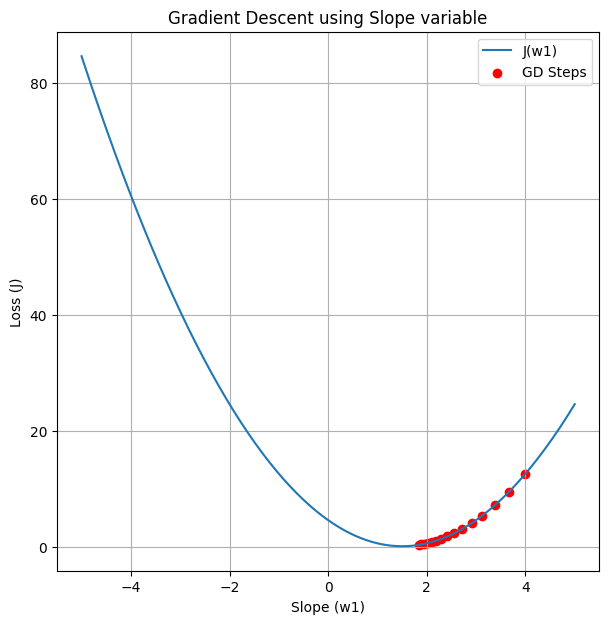

In [46]:

w_space = np.linspace(-5,5,200)
loss_space = [loss(w) for w in w_space]
plt.figure(figsize = (7,7))
plt.plot(w_space,loss_space, label="J(w1)")
plt.scatter(w1_values,loss_values,color="red",label="GD Steps")
plt.xlabel("Slope (w1)")
plt.ylabel("Loss (J)")
plt.title("Gradient Descent using Slope variable")
plt.legend()
plt.grid(True)
plt.show()